In [1]:
## Andreas Fahey - G00346830

In [2]:
## Project - Training a Model

In [3]:
## Imports
import keras as kr
import numpy as np
import matplotlib.pyplot as plt
## Got rid of Unnecessary imports after tidying & fixing model to suit web app

Using TensorFlow backend.


In [4]:
## Load the MNIST Dataset
(X_train, y_train), (X_test, y_test) = kr.datasets.mnist.load_data()

In [5]:
## This function splits the dataset into train and test sets
## Build input vector (28x28=784)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

## Normalising data
X_train = X_train/255
X_test = X_test/255

## MNIST Dataset 
## 10 unique digits
digits = 10

## Pass y train and y test to One Hot vectors, size = 10
y_train = kr.utils.np_utils.to_categorical(y_train, digits)
y_test = kr.utils.np_utils.to_categorical(y_test, digits)

## Third Value should be 1
print("One Hot Vector at index of 5: ", y_train[5])

One Hot Vector at index of 5:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


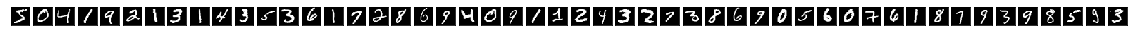

In [6]:
## Test Example
plt.figure(1, figsize=(20,10))
## Loop to display first 50 values in dataset
for i in range(50):
    plt.subplot(5,50,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

In [7]:
## Creating Neural Network
## Build linear stack of layers with Sequential Model
model = kr.models.Sequential()
model.add(kr.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(kr.layers.Dense(512, activation='relu'))
model.add(kr.layers.Dropout(0.2))
model.add(kr.layers.Dense(10, activation='softmax'))
print("LAYERS ADDED TO MODEL !")

LAYERS ADDED TO MODEL !


In [8]:
## This time going to show an in depth summary of the model
print("MODEL SUMMARY : ")
model.summary()

MODEL SUMMARY : 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [9]:
## Compiling and Training The Model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
print("COMPILED MODEL !")

COMPILED MODEL !


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 203us/step - loss: 0.1966 - accuracy: 0.9408 - val_loss: 0.1072 - val_accuracy: 0.9655
Epoch 2/5
60000/60000 [==============================] - 12s 196us/step - loss: 0.0814 - accuracy: 0.9755 - val_loss: 0.0763 - val_accuracy: 0.9760
Epoch 3/5
60000/60000 [==============================] - 12s 198us/step - loss: 0.0577 - accuracy: 0.9817 - val_loss: 0.0839 - val_accuracy: 0.9751
Epoch 4/5
60000/60000 [==============================] - 12s 202us/step - loss: 0.0422 - accuracy: 0.9865 - val_loss: 0.0758 - val_accuracy: 0.9776
Epoch 5/5
60000/60000 [==============================] - 12s 199us/step - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.0775 - val_accuracy: 0.9789
Result:
Accuracy: 0.992166638
Loss: 0.024142365
MODEL SAVED AS newModel.h5


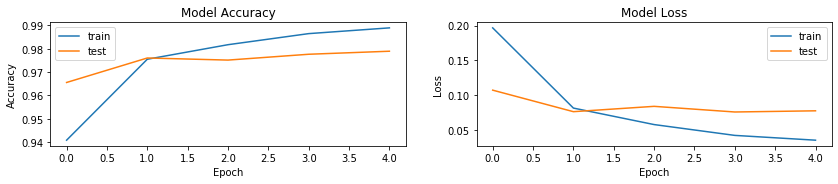

In [10]:
## Training The Model
## Saving The Metrics
## Reduced Epochs from 20 to 5 to save time
history = model.fit(X_train, y_train,
          batch_size = 50, epochs=5, 
          verbose=1, 
          validation_data=(X_test, y_test))

## Show Loss and Accuracy of Model
print("Result:")
score = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy: %0.9f' % score[1])
print('Loss: %0.9f' % score[0])


## Plotting Metrics
## Accuracy
plt.figure(1, figsize=(14,5))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## Loss
plt.subplot(2,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

## Saving my Model
## Now saving outside of savedModel folder due to Web App file access issues
model.save('newModel.h5')
print("MODEL SAVED AS newModel.h5")

In [11]:
## Load Model to Make Predictions
loadedModel = kr.models.load_model('newModel.h5')
print("MODEL LOADED, READY FOR PREDICTION TESTING !")

MODEL LOADED, READY FOR PREDICTION TESTING !


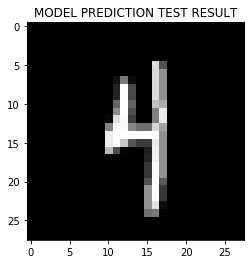

('Prediction: ', 4)

In [12]:
## Plots Image that will be sent for prediction
plt.imshow(X_test[65].reshape(28,28), cmap="gray")
plt.title('MODEL PREDICTION TEST RESULT')
plt.show()

## This will return an normalized output for each digit 
## I used argmax to return the actual prediction
"Prediction: ", np.argmax(loadedModel.predict(X_test[65:66]))